In [40]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
import requests
import time
import random
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

##Dimension reduction techniques
from sklearn.manifold import TSNE, SpectralEmbedding
from sklearn.decomposition import PCA, KernelPCA
import umap

##Supervised Learning
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


%matplotlib inline
from datetime import datetime
import seaborn as sns

from scipy import stats

In [2]:
##We will only use the categorical features that we curate
string_brackets_columns = ['resoFacts.patioAndPorchFeatures', 'resoFacts.waterSource', 'resoFacts.exteriorFeatures',
                           'resoFacts.interiorFeatures', 'resoFacts.communityFeatures', 'resoFacts.constructionMaterials',
                           'resoFacts.greenEnergyEfficient', 'resoFacts.foundationDetails', 
                           'resoFacts.utilities', 'resoFacts.appliances', 'resoFacts.flooring', 'resoFacts.parkingFeatures',
                           'resoFacts.lotFeatures', 'resoFacts.fireplaceFeatures', 'resoFacts.laundryFeatures', 
                           'resoFacts.propertySubType', 'resoFacts.securityFeatures', 
                           'resoFacts.cooling', 'resoFacts.windowFeatures', 'resoFacts.heating', 'resoFacts.sewer', 
                           'resoFacts.poolFeatures']

string_comma_columns = ['resoFacts.structureType', 'resoFacts.architecturalStyle', 
                        'resoFacts.fencing', 'resoFacts.roofType']

t = string_brackets_columns + string_comma_columns
Selected_features = list(set(t) - set(['resoFacts.utilities', 'resoFacts.propertySubType']))

Month = 'September'
Year = '2022'
main_df = pd.read_csv("C:\\Users\\Khoatruong\\DATA365\\House Capstone Project\\Data cleaning\\Clean_data_House_properties\\" + Month + '_' + Year + '\\houses_properties_' + Month + '.csv')
cols = main_df.columns.tolist()
for c in cols:
    if 'resoFacts.' in c:
        feature = c.split('.')[1]
        main_df[feature] = main_df[c]
        main_df.drop(labels = [c], axis = 1, inplace = True)

##Drop unimportant features 
main_df.drop(labels = ['streetAddress', 'countyId', 'hasCooling', 'hasHeating'], axis = 1, inplace = True)
main_df.reset_index(drop = True, inplace = True)
main_df

zpid  annualHomeownersInsurance  monthlyHoaFee  livingAreaValue  \
0      220116093                        756            0.0            748.0   
1      220116230                        794            0.0           1425.0   
2      220098008                        819            0.0           1416.0   
3       78939206                        622            0.0            820.0   
4       78938461                        836            0.0           1296.0   
...          ...                        ...            ...              ...   
12673   67640476                       5250            0.0           4601.0   
12674  117637372                       8190            0.0           3659.0   
12675   67656170                       3776            0.0           2584.0   
12676   67640330                       5670            0.0           2826.0   
12677   27361004                       3780            0.0           1364.0   

       bedrooms  longitude   latitude  zipcode        city  \
0           2.0 -97.789510  33.293644    76431       Chico   
1           3.0 -97.798600  33.296837    76431       Chico   
2           2.0 -97.796005  33.292850    76431       Chico   
3           2.0 -97.748680  33.210660    76426  Bridgeport   
4           4.0 -97.584170  33.239480    76234     Decatur   
...         ...        ...        ...      ...         ...   
12673       4.0 -96.857666  32.228120    76041   Forreston   
12674       4.0 -97.042015  32.297650    76064    Maypearl   
12675       3.0 -96.832670  32.359640    75165  Waxahachie   
12676       3.0 -96.945750  32.342957    75167  Waxahachie   
12677       2.0 -96.635216  32.318490    75119       Ennis   

       mortgageRates.fifteenYearFixedRate  ...  parking  hasSpa  \
0                                   5.639  ...        4   False   
1                                   5.639  ...        0   False   
2                                   5.639  ...        2   False   
3                                   5.639  ...        0   False   
4                                   5.639  ...        0   False   
...                                   ...  ...      ...     ...   
12673                               5.978  ...        3   False   
12674                               5.978  ...        3    True   
12675                               5.978  ...        0   False   
12676                               5.978  ...        2   False   
12677                               5.978  ...        2   False   

       coveredSpaces  bathrooms bathroomsHalf bathroomsFull  hasFireplace  \
0                4.0        2.0           0.0           2.0         False   
1                0.0        2.0           0.0           2.0         False   
2                2.0        2.0           0.0           2.0         False   
3                0.0        1.0           0.0           1.0         False   
4                0.0        2.0           0.0           2.0         False   
...              ...        ...           ...           ...           ...   
12673            3.0        6.0           2.0           4.0          True   
12674            3.0        4.0           2.0           2.0          True   
12675            0.0        2.0           0.0           2.0         False   
12676            2.0        3.0           0.0           3.0          True   
12677            2.0        1.0           0.0           1.0          True   

       fireplaces  levels  isNewConstruction  
0             0.0     One              False  
1             0.0     One              False  
2             0.0     One              False  
3             0.0     One              False  
4             0.0     One              False  
...           ...     ...                ...  
12673         1.0     Two              False  
12674         2.0     One              False  
12675         0.0     One              False  
12676         1.0     One              False  
12677         1.0     One              False  

[12678 rows x 36 column

In [3]:
path_abs = "C:\\Users\\Khoatruong\\DATA365\\House Capstone Project\\Data cleaning\\Houses_categorical_property\\"
for category in Selected_features:
    ft = category.split('.')[1]
    name = 'houses' + '_' + ft + '.csv'
    df_cat = pd.read_csv(path_abs + Month + '_' + Year + '\\' + name)
    main_df = pd.merge(main_df, df_cat, how = 'left', on = 'zpid')

main_df.drop(labels = ['zpid'], axis = 1, inplace = True)
category_list = ['zipcode', 'city', 'county', 'SchoolDistrict', 'isSeniorCommunity', 'hasAssociation', 'hasPrivatePool', 
                 'canRaiseHorses', 'hasGarage', 'hasAttachedGarage', 'hasCarport', 'hasSpa', 'hasFireplace', 
                 'levels', 'isNewConstruction']

numerical_list = ['annualHomeownersInsurance', 'monthlyHoaFee', 'livingAreaValue', 'bedrooms', 'longitude', 'latitude',
                  'mortgageRates.fifteenYearFixedRate', 'mortgageRates.thirtyYearFixedRate', 'mortgageRates.arm5Rate', 
                  'propertyTaxRate', 'price', 'Crime_per_1000', 'carportSpaces', 'garageSpaces', 'parking', 'coveredSpaces',
                  'bathrooms', 'bathroomsHalf', 'bathroomsFull', 'fireplaces']

string_list = ['city', 'county', 'SchoolDistrict', 'levels']
for string in string_list:
    main_df[string] = main_df[string].str.lower()

In [4]:
def transform_data(main_df, category_list):
    df_transformed = main_df.copy()
    for cat in category_list:
        all_values = df_transformed[cat].unique()
        if (len(all_values) == 2) and (True in all_values) and (False in all_values):
            df_transformed.loc[df_transformed[cat] == True, cat] = 1
            df_transformed.loc[df_transformed[cat] == False, cat] = 0
        elif len(all_values) > 2:
            new_ft = pd.get_dummies(df_transformed[cat], prefix = cat)
            df_transformed = pd.concat([df_transformed, new_ft], axis = 1)
            df_transformed.drop(labels = [cat], axis = 1, inplace = True)
    
    all_cols = df_transformed.columns.tolist()
    encoded_categories = sorted(set(all_cols) - set(numerical_list))
    n_list = sorted(set(numerical_list) - set(['price']))
    all_features = encoded_categories + n_list
    
    df_transformed = df_transformed[all_features + ['price']]
    ##we want to keep the list of features in order
    return all_features, df_transformed

def scale_data(df_transformed, numerical_list):
    df_scaled = df_transformed.copy()
    for num in numerical_list:
        col = df_scaled[num].to_numpy().reshape(-1, 1)
        scaler = MinMaxScaler()
        col_transformed = scaler.fit_transform(col)
        df_scaled[num] = col_transformed
    return df_scaled

In [5]:
all_features, df_transformed = transform_data(main_df, category_list)

In [6]:
df_transformed['price_group'] = 0
df_transformed.loc[(df_transformed['price'] >= 0) & (df_transformed['price'] < 200000), 'price_group'] = '0 to 200k ($)'
df_transformed.loc[(df_transformed['price'] >= 200000) & (df_transformed['price'] < 400000), 'price_group'] = '200k to 400k ($)'
df_transformed.loc[(df_transformed['price'] >= 400000) & (df_transformed['price'] < 600000), 'price_group'] = '400k to 600k ($)'
df_transformed.loc[(df_transformed['price'] >= 600000) & (df_transformed['price'] < 800000), 'price_group'] = '600k to 800k ($)'
df_transformed.loc[(df_transformed['price'] >= 800000), 'price_group'] = '>= 800k ($)'
df_transformed.drop(labels = ['price'], axis = 1, inplace = True)

In [7]:
n_list = sorted(set(numerical_list) - set(['price']))
df_scaled = scale_data(df_transformed, n_list)
df_scaled

SchoolDistrict_aledo isd  SchoolDistrict_allen isd  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
12673                         0                         0   
12674                         0                         0   
12675                         0                         0   
12676                         0                         0   
12677                         0                         0   

       SchoolDistrict_alvarado isd  SchoolDistrict_alvord isd  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
12673                            0                          0   
12674                            0                          0   
12675                            0                          0   
12676                            0                          0   
12677                            0                          0   

       SchoolDistrict_anna isd  SchoolDistrict_argyle isd  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
...                        ...                        ...   
12673                        0                          0   
12674                        0                          0   
12675                        0                          0   
12676                        0                          0   
12677                        0                          0   

       SchoolDistrict_arlington isd  SchoolDistrict_aubrey isd  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   
...                             ...                        ...   
12673                             0                          0   
12674                             0                          0   
12675                             0                          0   
12676                             0                          0   
12677                             0                          0   

       SchoolDistrict_avalon isd  SchoolDistrict_azle isd  ...  latitude  \
0                              0                        0  ...  0.894944   
1                              0                        0  ...  0.897364   
2                              0                        0  ...  0.894343   
3                              0                        0  ...  0.832067   
4                              0                        0  ...  0.853904   
...                          ...                      ...  ...       ...   
12673                          0                        0  ...  0.087587   
12674                          0                        0  ...  0.140270   
12675                          0                        0  ...  0.187241   
12676                          0                        0  ...  0.174600   
12677                          0                        0  ...  0.156061   

       livingAreaValue  longitude  monthlyHoaFee  mort

In [8]:
columns = df_scaled.columns.tolist()
for col in columns:
    print("Null in "+ col + ": {}".format(df_scaled[col].isnull().sum()))

Null in SchoolDistrict_aledo isd: 0
Null in SchoolDistrict_allen isd: 0
Null in SchoolDistrict_alvarado isd: 0
Null in SchoolDistrict_alvord isd: 0
Null in SchoolDistrict_anna isd: 0
Null in SchoolDistrict_argyle isd: 0
Null in SchoolDistrict_arlington isd: 0
Null in SchoolDistrict_aubrey isd: 0
Null in SchoolDistrict_avalon isd: 0
Null in SchoolDistrict_azle isd: 0
Null in SchoolDistrict_birdville isd: 0
Null in SchoolDistrict_bland isd: 0
Null in SchoolDistrict_blue ridge isd: 0
Null in SchoolDistrict_bowie isd: 0
Null in SchoolDistrict_boyd isd: 0
Null in SchoolDistrict_bridgeport isd: 0
Null in SchoolDistrict_brock isd: 0
Null in SchoolDistrict_burleson isd: 0
Null in SchoolDistrict_carroll isd: 0
Null in SchoolDistrict_carrollton-farmers branch isd: 0
Null in SchoolDistrict_castleberry isd: 0
Null in SchoolDistrict_cedar hill isd: 0
Null in SchoolDistrict_celina isd: 0
Null in SchoolDistrict_chico isd: 0
Null in SchoolDistrict_cleburne isd: 0
Null in SchoolDistrict_community isd: 

Null in zipcode_75061: 0
Null in zipcode_75062: 0
Null in zipcode_75063: 0
Null in zipcode_75065: 0
Null in zipcode_75067: 0
Null in zipcode_75068: 0
Null in zipcode_75069: 0
Null in zipcode_75070: 0
Null in zipcode_75071: 0
Null in zipcode_75072: 0
Null in zipcode_75074: 0
Null in zipcode_75075: 0
Null in zipcode_75077: 0
Null in zipcode_75078: 0
Null in zipcode_75080: 0
Null in zipcode_75081: 0
Null in zipcode_75082: 0
Null in zipcode_75087: 0
Null in zipcode_75088: 0
Null in zipcode_75089: 0
Null in zipcode_75093: 0
Null in zipcode_75094: 0
Null in zipcode_75098: 0
Null in zipcode_75104: 0
Null in zipcode_75114: 0
Null in zipcode_75115: 0
Null in zipcode_75116: 0
Null in zipcode_75119: 0
Null in zipcode_75125: 0
Null in zipcode_75126: 0
Null in zipcode_75134: 0
Null in zipcode_75137: 0
Null in zipcode_75141: 0
Null in zipcode_75142: 0
Null in zipcode_75143: 0
Null in zipcode_75146: 0
Null in zipcode_75147: 0
Null in zipcode_75149: 0
Null in zipcode_75150: 0
Null in zipcode_75152: 0


In [9]:
X_full = df_scaled.iloc[:, :-1].to_numpy()
target1 = df_scaled['price_group'].to_numpy()
target2 = main_df['price'].to_numpy()

In [10]:
remove_features = ['SchoolDistrict', 'city', 'appliances', 'architecturalStyle', 'canRaiseHorses', 'greenEnergyEfficient', 
                   'isNewConstruction', 'county', 'laundryFeatures', 'sewer', 'structureType', 'waterSource', 
                   'windowFeatures', 'zipcode']

new_features = all_features.copy()
for ft1 in remove_features:
    for ft2 in new_features[:]:
        if ft1 in ft2:
            new_features.remove(ft2)

X_new = df_scaled[new_features].to_numpy()

### Different dimension reductions technique that is going to be used

In [10]:
tsne_2d = TSNE(n_components = 2, perplexity = 100, random_state = 0, learning_rate = 'auto', n_iter = 1200)
tsne_3d = TSNE(n_components = 3, perplexity = 100, random_state = 0, learning_rate = 'auto', n_iter = 1200)

pca_2d = PCA(n_components = 2, random_state = 0)
pca_3d = PCA(n_components = 3, random_state = 0)

kernel_pca_2d = KernelPCA(n_components = 2, kernel = 'rbf', random_state = 0)
kernel_pca_3d = KernelPCA(n_components = 3, kernel = 'rbf', random_state = 0)

umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

spectral_2d_rbf = SpectralEmbedding(n_components=2, affinity = 'rbf', random_state=0)
spectral_3d_rbf = SpectralEmbedding(n_components=3, affinity = 'rbf', random_state=0)

### Create functions that take in data to do projections and plot 2D comparisons

In [11]:
##This function only works with n-dimensions data
def embedding_data(X, target1, target2, technique, n_dimensions):
    projections = technique.fit_transform(X)
    dims = list()
    for i in range(n_dimensions):
        dims.append('x' + str(i+1))
    proj_df = pd.DataFrame(data = projections, columns = dims)
    proj_df['price_group'] = target1
    proj_df['price'] = target2
    return proj_df

In [12]:
##Name here represents the technique you use
##Plot 2D embedding based on the given data
def plot_2D_embedding(projections_full, projections_new, name, month):
    fig, ax = plt.subplots(1, 2, figsize = (15,7))
    n = len(projections_full.price_group.unique())
    st = fig.suptitle("House data 2D embedding " + '(' + month + ')', 
                      horizontalalignment='center', verticalalignment='top', fontsize="x-large")
    sns.scatterplot(x = 'x1', y = 'x2', hue = 'price_group', 
                    palette = sns.color_palette("hls", n), data = projections_full, 
                    legend = False, alpha = 0.25, ax = ax[0])
    
    sns.scatterplot(x = 'x1', y = 'x2', hue = 'price_group', 
                    palette = sns.color_palette("hls", n), data = projections_new,
                    legend = 'full', alpha = 0.25, ax = ax[1])
    sns.move_legend(ax[1], "upper left", bbox_to_anchor = (1, 1))
    ax[0].set_title(name + " 2D embedding of data (all features)")
    ax[1].set_title(name + " 2D embedding of data (removed features)")
    ax[1].set(xlabel = None, ylabel = None)
    fig.tight_layout()
    st.set_y(0.95)
    st.set_x(0.45)
    fig.subplots_adjust(top=0.85)
    plt.show()

### TSNE

In [14]:
projections_tsne_2d_full = embedding_data(X_full, target1, target2, tsne_2d, 2)
projections_tsne_2d_new = embedding_data(X_new, target1, target2, tsne_2d, 2)
projections_tsne_2d_new

C:\Users\Khoatruong\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Khoatruong\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


x1         x2    price_group    price
0      55.339466   0.838249  0 to 200k ($)   179900
1      51.191673   4.707778  0 to 200k ($)   189000
2      56.911263   5.414637  0 to 200k ($)   195000
3      59.147427  -1.598740  0 to 200k ($)   148000
4      56.803158   6.520311  0 to 200k ($)   199000
...          ...        ...            ...      ...
12673  -1.085105  16.901281    >= 800k ($)  1250000
12674 -16.570492 -39.339741    >= 800k ($)  1950000
12675  32.322041  18.281244    >= 800k ($)   899000
12676   0.304584  12.528193    >= 800k ($)  1350000
12677  59.660740  -5.167161    >= 800k ($)   899900

[12678 rows x 4 columns]

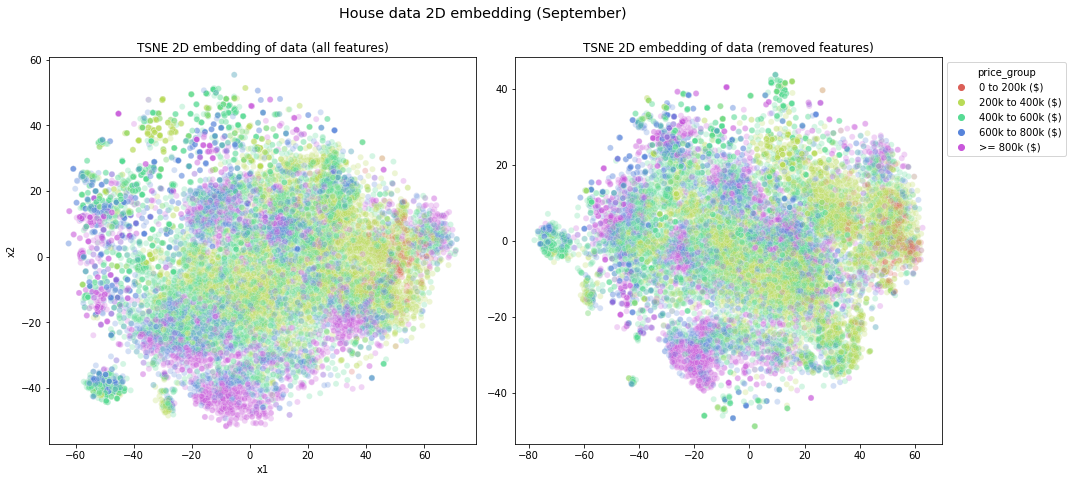

In [15]:
plot_2D_embedding(projections_tsne_2d_full, projections_tsne_2d_new, 'TSNE', 'September')

### PCA

In [16]:
projections_pca_2d_full = embedding_data(X_full, target1, target2, pca_2d, 2)
projections_pca_2d_new = embedding_data(X_new, target1, target2, pca_2d, 2)
projections_pca_2d_new

x1        x2    price_group    price
0     -2.893643  0.644531  0 to 200k ($)   179900
1     -2.517497  0.098808  0 to 200k ($)   189000
2     -1.753716 -0.052309  0 to 200k ($)   195000
3     -2.230402  0.703598  0 to 200k ($)   148000
4     -1.263653  0.336578  0 to 200k ($)   199000
...         ...       ...            ...      ...
12673  0.711280  2.786376    >= 800k ($)  1250000
12674  1.223461  4.230239    >= 800k ($)  1950000
12675 -0.763216  0.839003    >= 800k ($)   899000
12676 -0.532323  1.326158    >= 800k ($)  1350000
12677 -1.839691  1.112546    >= 800k ($)   899900

[12678 rows x 4 columns]

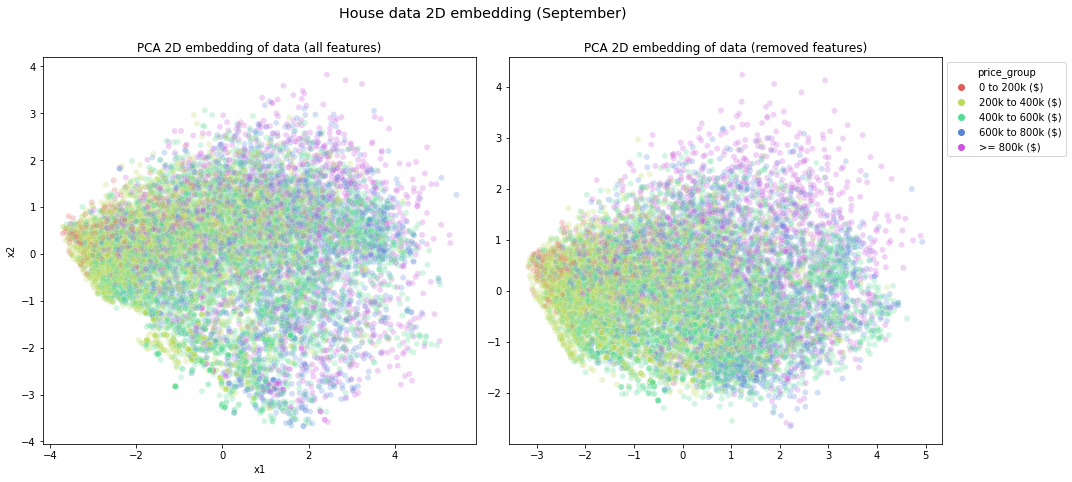

In [17]:
plot_2D_embedding(projections_pca_2d_full, projections_pca_2d_new, 'PCA', 'September')

### KernelPCA

In [18]:
projections_kernel_pca_2d_full = embedding_data(X_full, target1, target2, kernel_pca_2d, 2)
projections_kernel_pca_2d_new = embedding_data(X_new, target1, target2, kernel_pca_2d, 2)
projections_kernel_pca_2d_new

x1        x2    price_group    price
0     -0.262864  0.082416  0 to 200k ($)   179900
1     -0.237193  0.026445  0 to 200k ($)   189000
2     -0.160049  0.002556  0 to 200k ($)   195000
3     -0.195686  0.086522  0 to 200k ($)   148000
4     -0.112472  0.038252  0 to 200k ($)   199000
...         ...       ...            ...      ...
12673  0.074002  0.251285    >= 800k ($)  1250000
12674  0.122116  0.367519    >= 800k ($)  1950000
12675 -0.067044  0.082593    >= 800k ($)   899000
12676 -0.042858  0.125913    >= 800k ($)  1350000
12677 -0.159574  0.117537    >= 800k ($)   899900

[12678 rows x 4 columns]

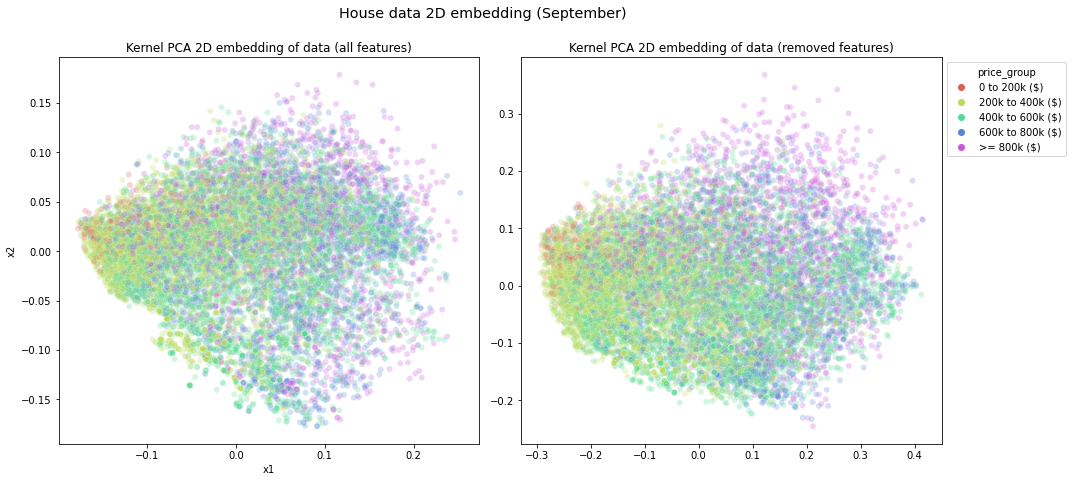

In [19]:
plot_2D_embedding(projections_kernel_pca_2d_full, projections_kernel_pca_2d_new, 'Kernel PCA', 'September')

### Spectral Embedding

In [20]:
projections_spectral_2d_full = embedding_data(X_full, target1, target2, spectral_2d_rbf, 2)
projections_spectral_2d_new = embedding_data(X_new, target1, target2, spectral_2d_rbf, 2)
projections_spectral_2d_new

x1            x2    price_group    price
0     -0.000150  6.655731e-05  0 to 200k ($)   179900
1     -0.000130  1.795802e-05  0 to 200k ($)   189000
2     -0.000090  1.968648e-07  0 to 200k ($)   195000
3     -0.000115  7.325239e-05  0 to 200k ($)   148000
4     -0.000064  3.778221e-05  0 to 200k ($)   199000
...         ...           ...            ...      ...
12673  0.000039  2.547647e-04    >= 800k ($)  1250000
12674  0.000066  3.942719e-04    >= 800k ($)  1950000
12675 -0.000038  8.077829e-05    >= 800k ($)   899000
12676 -0.000026  1.225871e-04    >= 800k ($)  1350000
12677 -0.000095  1.038016e-04    >= 800k ($)   899900

[12678 rows x 4 columns]

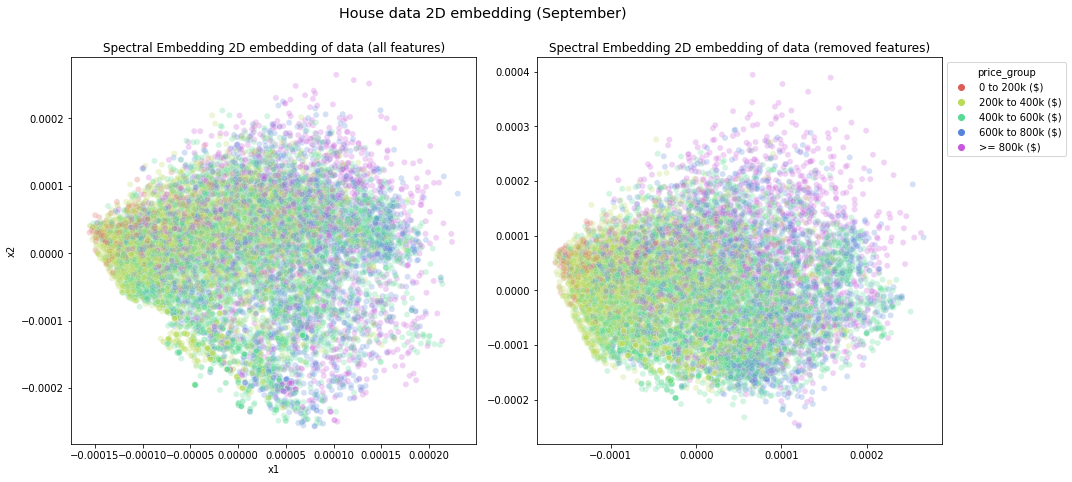

In [21]:
plot_2D_embedding(projections_spectral_2d_full, projections_spectral_2d_new, 'Spectral Embedding', 'September')

### Umap

In [22]:
projections_umap_2d_full = embedding_data(X_full, target1, target2, umap_2d, 2)
projections_umap_2d_new = embedding_data(X_new, target1, target2, umap_2d, 2)
projections_umap_2d_new

x1        x2    price_group    price
0       9.617864  8.439468  0 to 200k ($)   179900
1       9.754182  7.956846  0 to 200k ($)   189000
2       9.665436  7.857673  0 to 200k ($)   195000
3      10.332589  8.664724  0 to 200k ($)   148000
4       9.361003  8.283626  0 to 200k ($)   199000
...          ...       ...            ...      ...
12673   4.726032  7.511662    >= 800k ($)  1250000
12674   4.449384  7.788791    >= 800k ($)  1950000
12675   9.119417  5.476799    >= 800k ($)   899000
12676   6.296289  6.454106    >= 800k ($)  1350000
12677  10.284637  8.535460    >= 800k ($)   899900

[12678 rows x 4 columns]

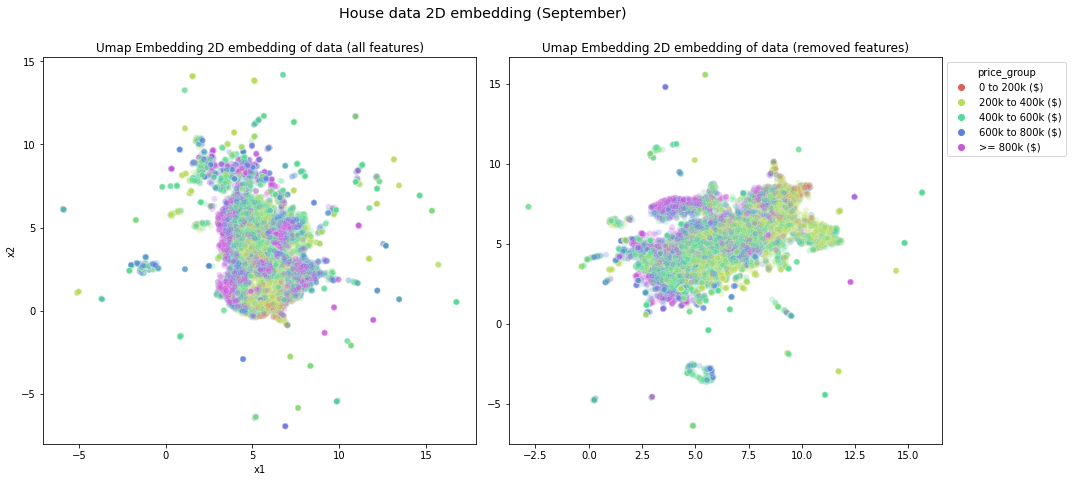

In [23]:
plot_2D_embedding(projections_umap_2d_full, projections_umap_2d_new, 'Umap Embedding', 'September')

### Use supervised learning methods to check if these projections are good

In [13]:
##Function that performs the K-Fold cross validation
def cross_validation(model, projections, n_dimensions, target, cv, metrics):
    data = projections.iloc[:, :n_dimensions].to_numpy()
    results = cross_validate(estimator = model, X = data, y = target, cv = cv,
                             scoring = metrics, return_train_score = True)
    return results

In [27]:
projections_tsne_2d_full.iloc[:, :2].to_numpy()

array([[54.85751  , -1.8382753],
       [54.645943 , -2.6102543],
       [54.905342 , -1.8773382],
       ...,
       [16.532833 , 17.55825  ],
       [-8.497816 , 22.017025 ],
       [50.44498  , -1.6391059]], dtype=float32)

### Using TSNE...

In [45]:
metrics_classifier = ['accuracy', 'balanced_accuracy', 'recall_micro', 'precision_micro', 'f1_micro']
n_dimensions = 2
model = SVC(random_state = 0)
cv = 10
results_full = cross_validation(model, projections_tsne_2d_full, n_dimensions, target1, cv, metrics_classifier)
results_full

{'fit_time': array([4.09199834, 4.02699828, 4.19900107, 4.15299678, 4.1799984 ,
        4.10100031, 3.94800043, 3.97300196, 4.02299976, 4.06900048]),
 'score_time': array([0.99500847, 0.99800038, 0.99599719, 1.0260005 , 0.99999952,
        1.00899935, 0.99300051, 1.00099778, 0.99000001, 1.00401068]),
 'test_accuracy': array([0.47555205, 0.51971609, 0.47870662, 0.579653  , 0.48107256,
        0.52208202, 0.45662461, 0.4384858 , 0.46566693, 0.49486977]),
 'train_accuracy': array([0.50376862, 0.49991236, 0.50026293, 0.48825592, 0.49570552,
        0.4971078 , 0.50631025, 0.50333041, 0.50574008, 0.4989922 ]),
 'test_balanced_accuracy': array([0.31819257, 0.34534522, 0.32528349, 0.37666175, 0.29986264,
        0.34988394, 0.31090798, 0.26770218, 0.30018524, 0.32447773]),
 'train_balanced_accuracy': array([0.33086963, 0.32859731, 0.3281313 , 0.32333215, 0.32682573,
        0.32752524, 0.34071378, 0.33416932, 0.33469393, 0.32837611]),
 'test_recall_micro': array([0.47555205, 0.51971609, 0.478

In [46]:
metrics_classifier = ['accuracy', 'balanced_accuracy', 'recall_micro', 'precision_micro', 'f1_micro']
n_dimensions = 2
model = SVC(random_state = 0)
cv = 10
results_new = cross_validation(model, projections_tsne_2d_new, n_dimensions, target1, cv, metrics_classifier)
results_new

{'fit_time': array([4.55200052, 4.52000284, 4.56299925, 4.5150044 , 4.63100243,
        4.65399766, 4.37399912, 4.34000015, 4.32500267, 4.55100083]),
 'score_time': array([1.00342751, 1.00799894, 1.01099992, 1.01799917, 0.99499607,
        1.01600122, 1.00800014, 1.0059998 , 1.05800128, 1.00400114]),
 'test_accuracy': array([0.48501577, 0.5055205 , 0.46214511, 0.55205047, 0.41640379,
        0.5307571 , 0.45583596, 0.43375394, 0.45303867, 0.49486977]),
 'train_accuracy': array([0.48431201, 0.48632778, 0.48711656, 0.47642419, 0.49447853,
        0.48001753, 0.49027169, 0.49614373, 0.49653843, 0.48470774]),
 'test_balanced_accuracy': array([0.31969696, 0.32159516, 0.29944979, 0.35597043, 0.25302346,
        0.35039307, 0.29866389, 0.27190575, 0.2835158 , 0.31137908]),
 'train_balanced_accuracy': array([0.30751986, 0.31009948, 0.30965267, 0.30664098, 0.31791696,
        0.30591631, 0.31219918, 0.32076986, 0.32026984, 0.30967007]),
 'test_recall_micro': array([0.48501577, 0.5055205 , 0.462

### Using Spectral Embedding

In [47]:
metrics_classifier = ['accuracy', 'balanced_accuracy', 'recall_micro', 'precision_micro', 'f1_micro']
n_dimensions = 2
model = SVC(random_state = 0)
cv = 10
results_full2 = cross_validation(model, projections_spectral_2d_full, n_dimensions, target1, cv, metrics_classifier)
results_full2

{'fit_time': array([5.30113983, 5.32399917, 5.35200024, 5.2889998 , 6.2180016 ,
        5.51100087, 5.28098059, 5.27299905, 5.19389963, 5.5304153 ]),
 'score_time': array([1.03400183, 1.0300014 , 1.02799964, 1.03300023, 1.07431364,
        1.03599787, 1.02700067, 1.03200173, 1.03199768, 1.037117  ]),
 'test_accuracy': array([0.42586751, 0.48028391, 0.4637224 , 0.5307571 , 0.41009464,
        0.51182965, 0.45347003, 0.44164038, 0.41278611, 0.47750592]),
 'train_accuracy': array([0.47440841, 0.46765995, 0.4733567 , 0.46380368, 0.47843996,
        0.46862401, 0.47589833, 0.47756354, 0.47471738, 0.46937166]),
 'test_balanced_accuracy': array([0.26067489, 0.29764893, 0.29019643, 0.32560153, 0.25209253,
        0.32591738, 0.28607516, 0.26881142, 0.25116906, 0.29606975]),
 'train_balanced_accuracy': array([0.29475994, 0.29088143, 0.29261459, 0.29012002, 0.29828592,
        0.29008244, 0.29646885, 0.29922717, 0.29938602, 0.29191908]),
 'test_recall_micro': array([0.42586751, 0.48028391, 0.463

In [48]:
metrics_classifier = ['accuracy', 'balanced_accuracy', 'recall_micro', 'precision_micro', 'f1_micro']
n_dimensions = 2
model = SVC(random_state = 0)
cv = 10
results_new2 = cross_validation(model, projections_spectral_2d_new, n_dimensions, target1, cv, metrics_classifier)
results_new2

{'fit_time': array([5.4001379 , 5.40631986, 5.61187863, 5.43727422, 5.35133672,
        5.52890682, 5.43960738, 5.40744829, 5.39523149, 5.48705029]),
 'score_time': array([1.01426768, 1.01707768, 1.00284433, 1.02912521, 0.99464083,
        1.0334115 , 1.02093291, 1.01943636, 1.00535464, 1.02153969]),
 'test_accuracy': array([0.46845426, 0.48580442, 0.46056782, 0.53470032, 0.39274448,
        0.5362776 , 0.45741325, 0.45977918, 0.43567482, 0.48697711]),
 'train_accuracy': array([0.47931639, 0.47572305, 0.47835232, 0.46853637, 0.48580193,
        0.46827344, 0.47738826, 0.47843996, 0.47874858, 0.47541846]),
 'test_balanced_accuracy': array([0.29928801, 0.30637944, 0.29271718, 0.33286183, 0.24120262,
        0.36100965, 0.29884866, 0.29454563, 0.27007921, 0.31639552]),
 'train_balanced_accuracy': array([0.30537523, 0.30392731, 0.30512382, 0.30119824, 0.31661842,
        0.29703189, 0.30498366, 0.30464018, 0.30824743, 0.30578878]),
 'test_recall_micro': array([0.46845426, 0.48580442, 0.460

In [ ]:
##When get back home, build a classification/regression table to track the data.

In [50]:
for i in range(len(full_features_proj)):
    full_features_proj[i].to_csv('Temporary_projections/full/data' + str(i) + '.csv', index = False)
    new_features_proj[i].to_csv('Temporary_projections/new/data' + str(i) + '.csv', index = False)

In [14]:
projections_tsne_2d_full = pd.read_csv('Temporary_projections/full/data0.csv')
projections_tsne_2d_new = pd.read_csv('Temporary_projections/new/data0.csv')

projections_pca_2d_full = pd.read_csv('Temporary_projections/full/data1.csv')
projections_pca_2d_new = pd.read_csv('Temporary_projections/new/data1.csv')

projections_kernel_pca_2d_full = pd.read_csv('Temporary_projections/full/data2.csv')
projections_kernel_pca_2d_new = pd.read_csv('Temporary_projections/new/data2.csv')

projections_spectral_2d_full = pd.read_csv('Temporary_projections/full/data3.csv')
projections_spectral_2d_new = pd.read_csv('Temporary_projections/new/data3.csv')

projections_umap_2d_full = pd.read_csv('Temporary_projections/full/data4.csv')
projections_umap_2d_new = pd.read_csv('Temporary_projections/new/data4.csv')

In [15]:
full_features_proj = [projections_tsne_2d_full, projections_pca_2d_full, projections_kernel_pca_2d_full, 
                      projections_spectral_2d_full, projections_umap_2d_full]
new_features_proj = [projections_tsne_2d_new, projections_pca_2d_new, projections_kernel_pca_2d_new, 
                     projections_spectral_2d_new, projections_umap_2d_new]

In [16]:
projections_spectral_2d_full

x1        x2    price_group    price
0     -0.000135  0.000031  0 to 200k ($)   179900
1     -0.000108  0.000018  0 to 200k ($)   189000
2     -0.000078  0.000008  0 to 200k ($)   195000
3     -0.000117  0.000034  0 to 200k ($)   148000
4     -0.000037  0.000039  0 to 200k ($)   199000
...         ...       ...            ...      ...
12673  0.000041  0.000196    >= 800k ($)  1250000
12674  0.000060  0.000248    >= 800k ($)  1950000
12675 -0.000032  0.000080    >= 800k ($)   899000
12676 -0.000031  0.000044    >= 800k ($)  1350000
12677 -0.000076  0.000083    >= 800k ($)   899900

[12678 rows x 4 columns]

### 2D embedding with price range

In [16]:
##This function will plot 2D scatterplot but with heatmap scale with prices
##We will stick with orginal prices since they are more distinctive to look at
##We will use this function to compare the graphs of equally scaled and (biased scale)
def plot_2D_embedding_heatmap(projections_full, projections_new, name, month):
    fig, ax = plt.subplots(1, 2, figsize = (15,7))
    st = fig.suptitle("House data 2D embedding with prices (in $k) as heatmap " + '(' + month + ')', 
                      horizontalalignment='center', verticalalignment='top', fontsize="x-large")
    
    cm = plt.cm.get_cmap('inferno')
    x1f = projections_full['x1'].to_numpy()
    x2f = projections_full['x2'].to_numpy()
    x1n = projections_new['x1'].to_numpy()
    x2n = projections_new['x2'].to_numpy()
    z =  projections_full['price'].to_numpy()/1000
    
    ax0 = ax[0].scatter(x1f, x2f, c = z, vmin = 200, vmax = 800, s = 18, cmap = cm, alpha = 0.6)
    ax1 = ax[1].scatter(x1n, x2n, c = z, vmin = 200, vmax = 800, s = 18, cmap = cm, alpha = 0.6)
    ax[0].set_title(name + " 2D embedding of data (equally scaled features)")
    ax[1].set_title(name + " 2D embedding of data (unequally scaled features)")
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    ax[1].set(xlabel = None, ylabel = None)
    plt.colorbar(ax0)
    plt.colorbar(ax1)
    fig.tight_layout()
    st.set_y(0.95)
    st.set_x(0.49)
    fig.subplots_adjust(top=0.85)
    plt.show()

### TSNE

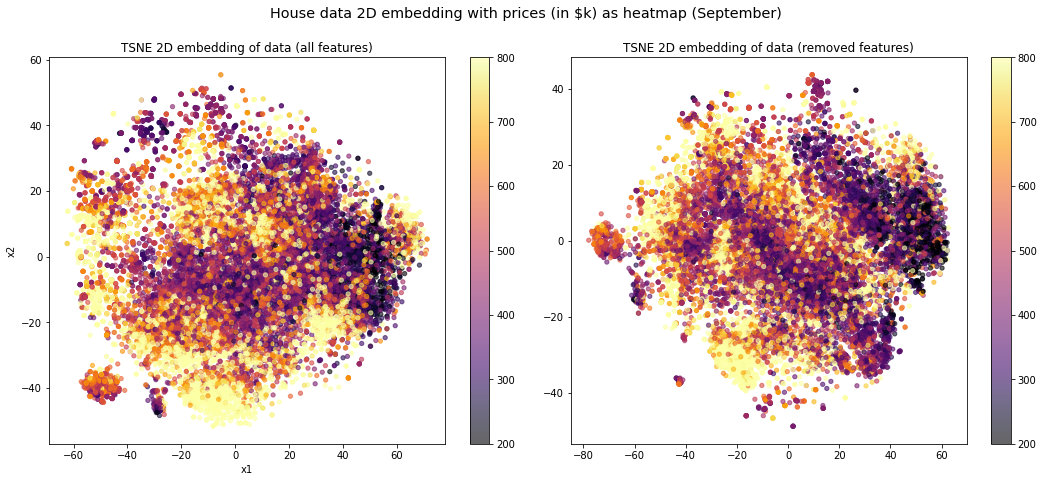

In [81]:
plot_2D_embedding_heatmap(projections_tsne_2d_full, projections_tsne_2d_new, 'TSNE', 'September')

### PCA

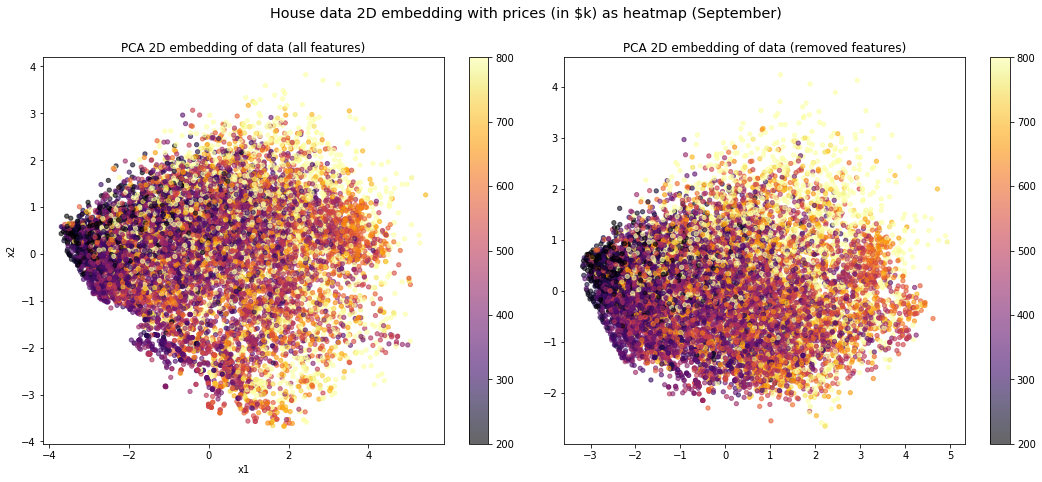

In [82]:
plot_2D_embedding_heatmap(projections_pca_2d_full, projections_pca_2d_new, 'PCA', 'September')

### Kernel PCA

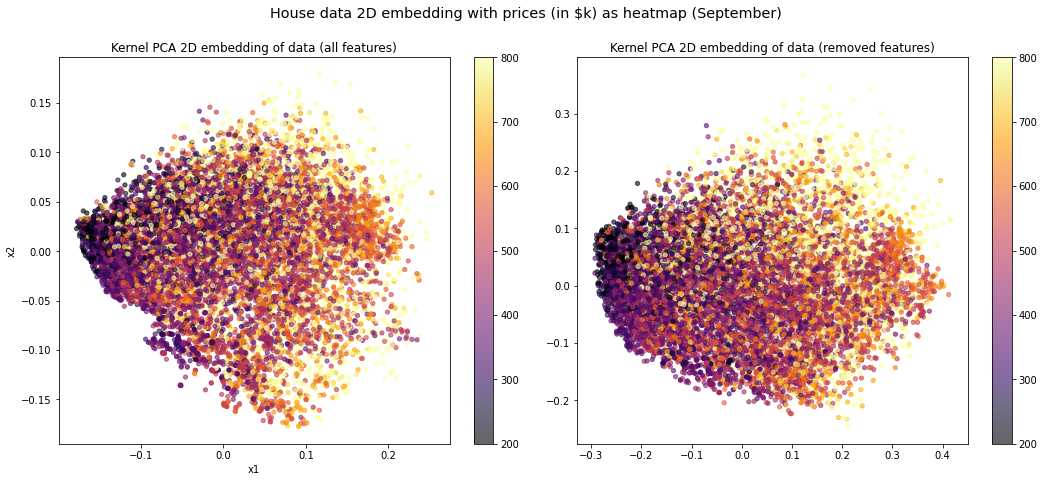

In [83]:
plot_2D_embedding_heatmap(projections_kernel_pca_2d_full, projections_kernel_pca_2d_new, 'Kernel PCA', 'September')

### Spectral Embedding

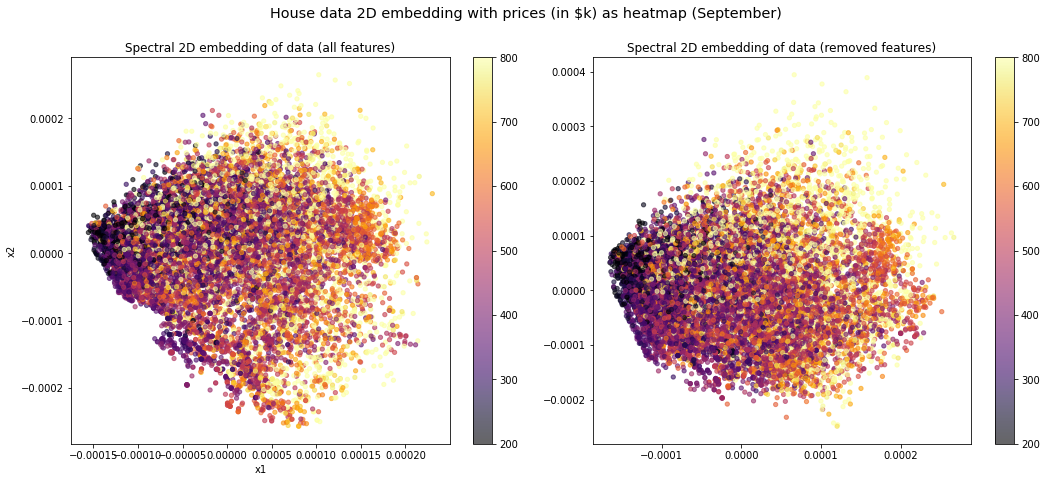

In [80]:
plot_2D_embedding_heatmap(projections_spectral_2d_full, projections_spectral_2d_new, 'Spectral', 'September')

### Umap

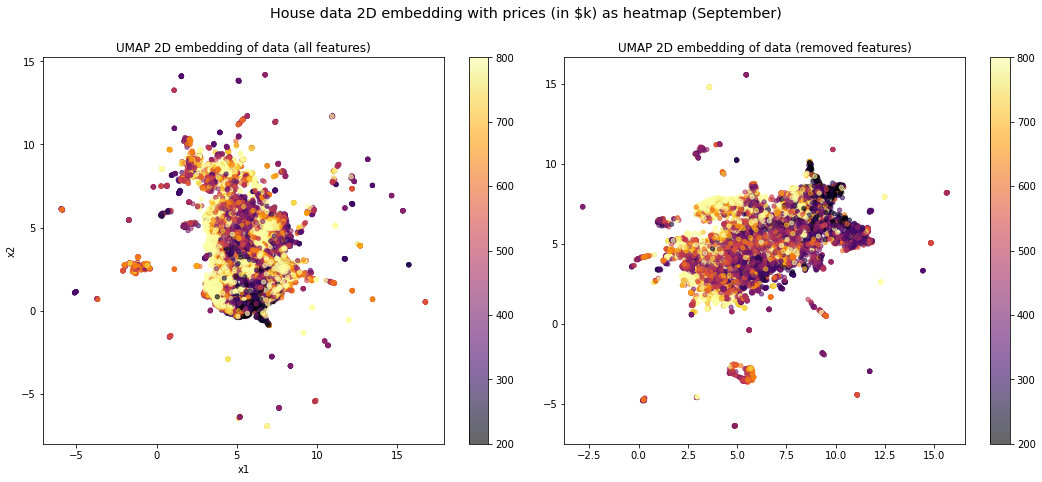

In [84]:
plot_2D_embedding_heatmap(projections_umap_2d_full, projections_umap_2d_new, 'UMAP', 'September')

### Use the cross_validate  function above to measure the performance of these techniques

In [21]:
svr = SVR()
n_dimensions = 2
cv = 10
metrics_regression = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']
results_tsne_reg = cross_validation(svr, projections_tsne_2d_full, n_dimensions, target2, cv, metrics_regression)

{'fit_time': array([4.52299929, 4.46400046, 4.45200038, 4.45200062, 4.44799304,
        4.50690317, 4.46899962, 4.50300217, 4.48999977, 4.47100067]),
 'score_time': array([1.06900096, 1.06000209, 1.06400037, 1.06499934, 1.06399918,
        1.06100321, 1.06404209, 1.06299734, 1.06400061, 1.06099939]),
 'test_r2': array([-0.10704971, -0.86994984, -0.03601258, -0.82138678, -0.08423603,
        -0.16433363, -0.13448822, -0.50909031, -0.02090904, -0.00858752]),
 'train_r2': array([-0.05579663, -0.07616767, -0.07217968, -0.06623743, -0.06265485,
        -0.06720993, -0.0575556 , -0.0686493 , -0.0648153 , -0.06895517]),
 'test_neg_root_mean_squared_error': array([-183097.47346435, -380683.74232254, -180619.91405732,
        -417326.04149052, -276619.4431292 , -273564.31467749,
        -296773.42350973, -431605.37609413, -272088.49048   ,
        -229689.00338774]),
 'train_neg_root_mean_squared_error': array([-306153.54428936, -296936.88393779, -310783.52332416,
        -289969.05252247, -298

In [22]:
results_tsne_reg['test_r2']

array([-0.10704971, -0.86994984, -0.03601258, -0.82138678, -0.08423603,
       -0.16433363, -0.13448822, -0.50909031, -0.02090904, -0.00858752])

In [23]:
results_spectral_reg = cross_validation(svr, projections_spectral_2d_full, n_dimensions, target2, cv, metrics_regression)
results_spectral_reg['test_r2']

array([-0.10553652, -0.86964838, -0.03589613, -0.82155193, -0.08354736,
       -0.16401244, -0.13320271, -0.50694764, -0.02024159, -0.00808104])

### We need to increase the importance of some variables

In [25]:
##What if we increase the important of numerical features
main_df.columns.tolist()

['annualHomeownersInsurance',
 'monthlyHoaFee',
 'livingAreaValue',
 'bedrooms',
 'longitude',
 'latitude',
 'zipcode',
 'city',
 'mortgageRates.fifteenYearFixedRate',
 'mortgageRates.thirtyYearFixedRate',
 'mortgageRates.arm5Rate',
 'propertyTaxRate',
 'price',
 'county',
 'SchoolDistrict',
 'Crime_per_1000',
 'isSeniorCommunity',
 'hasAssociation',
 'hasPrivatePool',
 'canRaiseHorses',
 'hasGarage',
 'hasAttachedGarage',
 'hasCarport',
 'carportSpaces',
 'garageSpaces',
 'parking',
 'hasSpa',
 'coveredSpaces',
 'bathrooms',
 'bathroomsHalf',
 'bathroomsFull',
 'hasFireplace',
 'fireplaces',
 'levels',
 'isNewConstruction',
 'lotFeatures_none',
 'lotFeatures_cornerlot',
 'lotFeatures_fewtrees',
 'lotFeatures_lrg.backyardgrass',
 'lotFeatures_interiorlot',
 'lotFeatures_landscaped',
 'lotFeatures_subdivided',
 'lotFeatures_manytrees',
 'lotFeatures_acreage',
 'lotFeatures_cul-de-sac',
 'lotFeatures_other',
 'lotFeatures_sprinklersystem',
 'flooring_luxuryvinylplank',
 'flooring_carpet'

In [17]:
df_transformed2 = df_transformed.copy()
##Drop price group
df_transformed2.drop(labels = ['price_group'], inplace = True, axis = 1)
df_transformed2['price'] = main_df['price']
df_transformed2

SchoolDistrict_aledo isd  SchoolDistrict_allen isd  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
12673                         0                         0   
12674                         0                         0   
12675                         0                         0   
12676                         0                         0   
12677                         0                         0   

       SchoolDistrict_alvarado isd  SchoolDistrict_alvord isd  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
12673                            0                          0   
12674                            0                          0   
12675                            0                          0   
12676                            0                          0   
12677                            0                          0   

       SchoolDistrict_anna isd  SchoolDistrict_argyle isd  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
...                        ...                        ...   
12673                        0                          0   
12674                        0                          0   
12675                        0                          0   
12676                        0                          0   
12677                        0                          0   

       SchoolDistrict_arlington isd  SchoolDistrict_aubrey isd  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   
...                             ...                        ...   
12673                             0                          0   
12674                             0                          0   
12675                             0                          0   
12676                             0                          0   
12677                             0                          0   

       SchoolDistrict_avalon isd  SchoolDistrict_azle isd  ...   latitude  \
0                              0                        0  ...  33.293644   
1                              0                        0  ...  33.296837   
2                              0                        0  ...  33.292850   
3                              0                        0  ...  33.210660   
4                              0                        0  ...  33.239480   
...                          ...                      ...  ...        ...   
12673                          0                        0  ...  32.228120   
12674                          0                        0  ...  32.297650   
12675                          0                        0  ...  32.359640   
12676                          0                        0  ...  32.342957   
12677                          0                        0  ...  32.318490   

       livingAreaValue  longitude  monthly

In [19]:
df_transformed2.columns.tolist()

['SchoolDistrict_aledo isd',
 'SchoolDistrict_allen isd',
 'SchoolDistrict_alvarado isd',
 'SchoolDistrict_alvord isd',
 'SchoolDistrict_anna isd',
 'SchoolDistrict_argyle isd',
 'SchoolDistrict_arlington isd',
 'SchoolDistrict_aubrey isd',
 'SchoolDistrict_avalon isd',
 'SchoolDistrict_azle isd',
 'SchoolDistrict_birdville isd',
 'SchoolDistrict_bland isd',
 'SchoolDistrict_blue ridge isd',
 'SchoolDistrict_bowie isd',
 'SchoolDistrict_boyd isd',
 'SchoolDistrict_bridgeport isd',
 'SchoolDistrict_brock isd',
 'SchoolDistrict_burleson isd',
 'SchoolDistrict_carroll isd',
 'SchoolDistrict_carrollton-farmers branch isd',
 'SchoolDistrict_castleberry isd',
 'SchoolDistrict_cedar hill isd',
 'SchoolDistrict_celina isd',
 'SchoolDistrict_chico isd',
 'SchoolDistrict_cleburne isd',
 'SchoolDistrict_community isd',
 'SchoolDistrict_coppell isd',
 'SchoolDistrict_crandall isd',
 'SchoolDistrict_crowley isd',
 'SchoolDistrict_dallas isd',
 'SchoolDistrict_decatur isd',
 'SchoolDistrict_denton i

In [25]:
favored_num = ['annualHomeownersInsurance', 'monthlyHoaFee', 'livingAreaValue', 'bedrooms', 'longitude', 'latitude', 
               'carportSpaces', 'garageSpaces', 'parking', 'coveredSpaces', 'bathrooms', 'bathroomsHalf','bathroomsFull',
               'fireplaces']

df_scaled2 = df_transformed2.copy()
n_list = sorted(set(numerical_list) - set(['price']))
for num_ft in n_list:
    col = df_transformed2[num_ft].to_numpy().reshape(-1, 1)
    if num_ft in favored_num:
        scaler1 = MinMaxScaler(feature_range = (10, 25))
        col_transformed = scaler1.fit_transform(col)
        df_scaled2[num_ft] = col_transformed
    else:
        scaler2 = MinMaxScaler(feature_range = (0, 1))
        col_transformed = scaler2.fit_transform(col)
        df_scaled2[num_ft] = col_transformed

In [26]:
df_scaled2

SchoolDistrict_aledo isd  SchoolDistrict_allen isd  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
12673                         0                         0   
12674                         0                         0   
12675                         0                         0   
12676                         0                         0   
12677                         0                         0   

       SchoolDistrict_alvarado isd  SchoolDistrict_alvord isd  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
12673                            0                          0   
12674                            0                          0   
12675                            0                          0   
12676                            0                          0   
12677                            0                          0   

       SchoolDistrict_anna isd  SchoolDistrict_argyle isd  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
...                        ...                        ...   
12673                        0                          0   
12674                        0                          0   
12675                        0                          0   
12676                        0                          0   
12677                        0                          0   

       SchoolDistrict_arlington isd  SchoolDistrict_aubrey isd  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   
...                             ...                        ...   
12673                             0                          0   
12674                             0                          0   
12675                             0                          0   
12676                             0                          0   
12677                             0                          0   

       SchoolDistrict_avalon isd  SchoolDistrict_azle isd  ...   latitude  \
0                              0                        0  ...  23.424165   
1                              0                        0  ...  23.460456   
2                              0                        0  ...  23.415141   
3                              0                        0  ...  22.480999   
4                              0                        0  ...  22.808556   
...                          ...                      ...  ...        ...   
12673                          0                        0  ...  11.313800   
12674                          0                        0  ...  12.104053   
12675                          0                        0  ...  12.808609   
12676                          0                        0  ...  12.618996   
12677                          0                        0  ...  12.340913   

       livingAreaValue  longitude  monthly

In [27]:
X_full2 = df_scaled2.iloc[:, :-1].to_numpy()
target_price = df_scaled2['price'].to_numpy()

In [81]:
projections_tsne_2d_full = embedding_data(X_full, target1, target2, tsne_2d, 2)
projections_pca_2d_full = embedding_data(X_full, target1, target2, pca_2d, 2)
projections_kernel_pca_2d_full = embedding_data(X_full, target1, target2, kernel_pca_2d, 2)

C:\Users\Khoatruong\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


NameError: name 'spectral_2d' is not defined

In [82]:
projections_spectral_2d_full = embedding_data(X_full, target1, target2, spectral_2d_rbf, 2)
projections_umap_2d_full = embedding_data(X_full, target1, target2, umap_2d, 2)

#### TSNE rescale

In [28]:
projections_tsne_2d_rescale = embedding_data(X_full2, target1, target_price, tsne_2d, 2)
projections_tsne_2d_rescale

C:\Users\Khoatruong\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


x1         x2    price_group    price
0      31.721313 -46.796612  0 to 200k ($)   179900
1      31.130325 -44.681065  0 to 200k ($)   189000
2      31.483662 -46.482746  0 to 200k ($)   195000
3      31.979361 -43.735252  0 to 200k ($)   148000
4      30.519203 -44.341133  0 to 200k ($)   199000
...          ...        ...            ...      ...
12673 -38.114620 -51.735188    >= 800k ($)  1250000
12674 -36.626701 -49.539936    >= 800k ($)  1950000
12675  37.932571  27.804605    >= 800k ($)   899000
12676  24.985004  21.473457    >= 800k ($)  1350000
12677  40.189125  36.814915    >= 800k ($)   899900

[12678 rows x 4 columns]

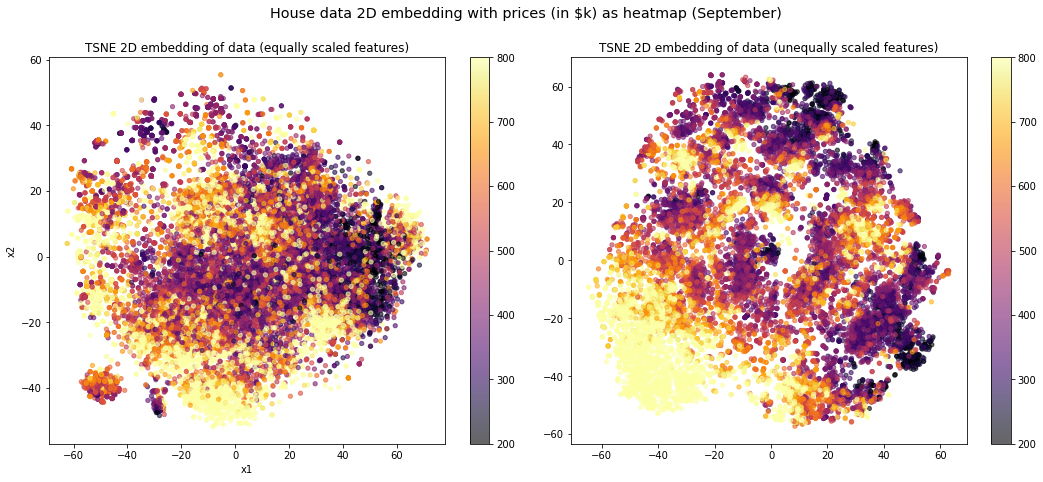

In [83]:
##The left picture is where we put every columns into 0-1
##The right picture is where we put "important columns" into 10-25 while the rest is 0-1
plot_2D_embedding_heatmap(projections_tsne_2d_full, projections_tsne_2d_rescale, 'TSNE', 'September')

#### Spectral rescale

In [30]:
projections_spectral_2d_rescale = embedding_data(X_full2, target1, target_price, spectral_2d_rbf, 2)
projections_spectral_2d_rescale

x1        x2    price_group    price
0     -0.000098  0.000045  0 to 200k ($)   179900
1     -0.000093  0.000037  0 to 200k ($)   189000
2     -0.000088  0.000044  0 to 200k ($)   195000
3     -0.000143  0.000026  0 to 200k ($)   148000
4     -0.000079  0.000014  0 to 200k ($)   199000
...         ...       ...            ...      ...
12673  0.000151  0.000187    >= 800k ($)  1250000
12674  0.000138  0.000208    >= 800k ($)  1950000
12675 -0.000059  0.000055    >= 800k ($)   899000
12676  0.000025  0.000121    >= 800k ($)  1350000
12677 -0.000110  0.000005    >= 800k ($)   899900

[12678 rows x 4 columns]

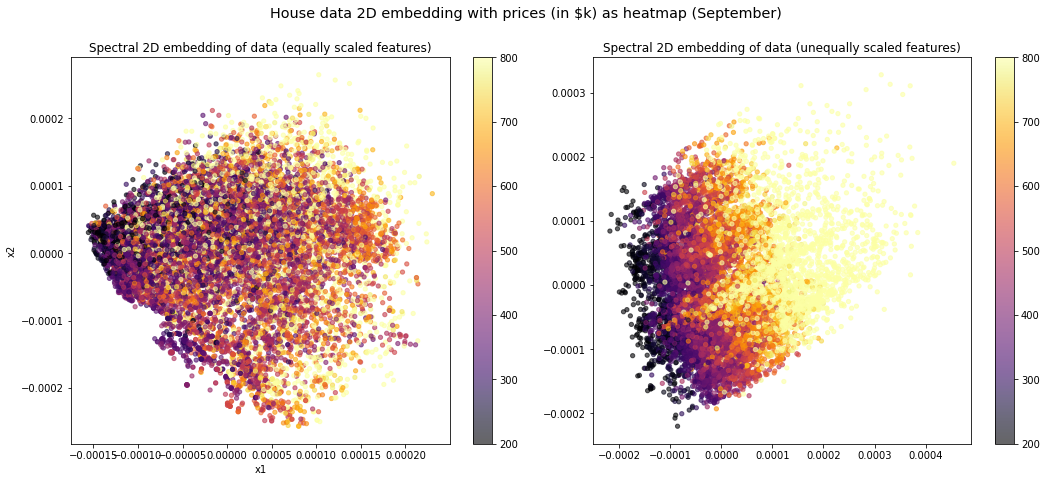

In [84]:
plot_2D_embedding_heatmap(projections_spectral_2d_full, projections_spectral_2d_rescale, 'Spectral', 'September')

#### PCA

In [32]:
projections_pca_2d_rescale = embedding_data(X_full2, target1, target_price, pca_2d, 2)
projections_pca_2d_rescale

x1        x2    price_group    price
0     -4.439935  1.518859  0 to 200k ($)   179900
1     -4.256368  1.233651  0 to 200k ($)   189000
2     -3.994238  1.477604  0 to 200k ($)   195000
3     -6.518562  0.857761  0 to 200k ($)   148000
4     -3.651950  0.419445  0 to 200k ($)   199000
...         ...       ...            ...      ...
12673  6.567727  6.305233    >= 800k ($)  1250000
12674  5.899335  7.021520    >= 800k ($)  1950000
12675 -2.489385  2.008072    >= 800k ($)   899000
12676  1.195160  4.212149    >= 800k ($)  1350000
12677 -4.776735  0.345510    >= 800k ($)   899900

[12678 rows x 4 columns]

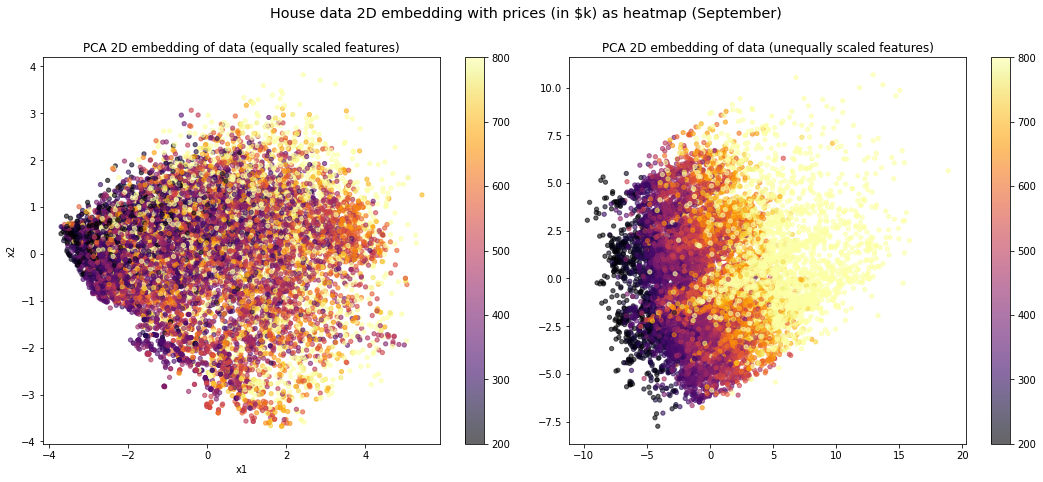

In [85]:
plot_2D_embedding_heatmap(projections_pca_2d_full, projections_pca_2d_rescale, 'PCA', 'September')

### Kernel PCA

In [34]:
projections_kernel_pca_2d_rescale = embedding_data(X_full2, target1, target_price, kernel_pca_2d, 2)
projections_kernel_pca_2d_rescale

x1        x2    price_group    price
0     -0.165819  0.070398  0 to 200k ($)   179900
1     -0.168293  0.059540  0 to 200k ($)   189000
2     -0.155184  0.069726  0 to 200k ($)   195000
3     -0.254080  0.042346  0 to 200k ($)   148000
4     -0.146787  0.023098  0 to 200k ($)   199000
...         ...       ...            ...      ...
12673  0.260912  0.266580    >= 800k ($)  1250000
12674  0.225111  0.275105    >= 800k ($)  1950000
12675 -0.118067  0.085994    >= 800k ($)   899000
12676  0.044915  0.185323    >= 800k ($)  1350000
12677 -0.200670  0.010310    >= 800k ($)   899900

[12678 rows x 4 columns]

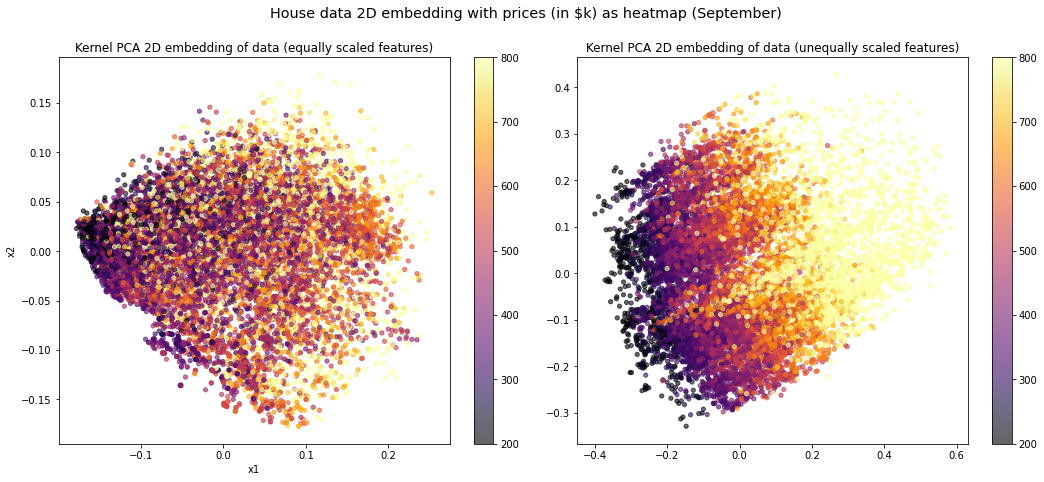

In [86]:
plot_2D_embedding_heatmap(projections_kernel_pca_2d_full, projections_kernel_pca_2d_rescale, 'Kernel PCA', 'September')

### Umap

In [38]:
projections_umap_2d_rescale = embedding_data(X_full2, target1, target_price, umap_2d, 2)
projections_umap_2d_rescale

x1        x2    price_group    price
0      5.436881 -1.416672  0 to 200k ($)   179900
1      5.641971 -1.584447  0 to 200k ($)   189000
2      5.529157 -1.582014  0 to 200k ($)   195000
3      5.684896 -1.676339  0 to 200k ($)   148000
4      5.578153 -1.664888  0 to 200k ($)   199000
...         ...       ...            ...      ...
12673  4.508492  3.099218    >= 800k ($)  1250000
12674  4.598173  2.901819    >= 800k ($)  1950000
12675  1.645931  6.342572    >= 800k ($)   899000
12676  1.900585  5.556144    >= 800k ($)  1350000
12677  1.822961  7.164599    >= 800k ($)   899900

[12678 rows x 4 columns]

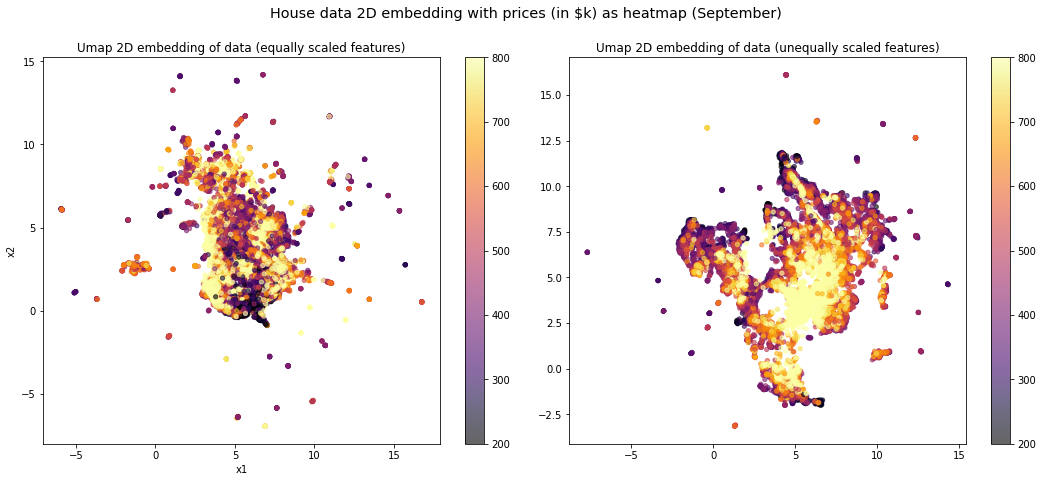

In [87]:
plot_2D_embedding_heatmap(projections_umap_2d_full, projections_umap_2d_rescale, 'Umap', 'September')

In [93]:
KNN_r = KNeighborsRegressor(n_neighbors = 55)
n_dimensions = 2
cv = 5
metrics_regression = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']
results_tsne_2d_full = cross_validation(KNN_r, projections_pca_2d_full, n_dimensions, 
                                        target_price, cv, metrics_regression)
results_tsne_2d_rescale = cross_validation(KNN_r, projections_pca_2d_rescale, n_dimensions, 
                                           target_price, cv, metrics_regression)

In [94]:
results_tsne_2d_rescale

{'fit_time': array([0.00600004, 0.00499892, 0.00700021, 0.00500011, 0.00599933]),
 'score_time': array([0.02200007, 0.02100039, 0.0219996 , 0.02399969, 0.02200365]),
 'test_r2': array([0.65424001, 0.83555012, 0.76954389, 0.75748414, 0.7376136 ]),
 'train_r2': array([0.84077805, 0.81434842, 0.82281619, 0.82597721, 0.83334057]),
 'test_neg_root_mean_squared_error': array([-159150.59907835, -112273.14295863, -130407.39335974,
        -174280.38262551, -128036.35043973]),
 'train_neg_root_mean_squared_error': array([-117723.89448996, -125411.47009471, -123498.96987237,
        -113644.5483344 , -122045.05760518]),
 'test_neg_mean_absolute_error': array([-115693.15645254,  -76410.83208345,  -91355.96446085,
        -107625.05178411,  -77904.56752376]),
 'train_neg_mean_absolute_error': array([-74970.37010631, -79459.29431168, -78872.47933526, -72068.09652156,
        -78431.65885653])}

In [95]:
results_tsne_2d_full['test_r2'].mean()

0.12671479562350832

In [96]:
results_tsne_2d_rescale['test_r2'].mean()

0.7508863521999063

### Create a table to store results

In [106]:
full_features_proj = [projections_tsne_2d_full, projections_pca_2d_full, projections_kernel_pca_2d_full, 
                      projections_spectral_2d_full, projections_umap_2d_full]

rescale_features_proj = [projections_tsne_2d_rescale, projections_pca_2d_rescale, projections_kernel_pca_2d_rescale, 
                         projections_spectral_2d_rescale, projections_umap_2d_rescale]

In [107]:
##This table will contain the results such as r2, mae to check which visualization represents the data better
def table_results(projections_list, n_dimensions, cv, technique, metrics_regression):
    m = len(projections_list)
    results_array = np.zeros((6, m))
    for i in range(m):
        target = projections_list[i]['price'].to_numpy()
        results = cross_validation(technique, projections_list[i], n_dimensions, 
                                   target, cv, metrics_regression)
        train_r2_mean = np.round(results['train_r2'].mean(), 4)
        test_r2_mean = np.round(results['test_r2'].mean(), 4)
        train_rmse_mean = np.round((results['train_neg_root_mean_squared_error'] * -1).mean(), 4)
        test_rmse_mean = np.round((results['test_neg_root_mean_squared_error'] * -1).mean(), 4)
        train_mae_mean = np.round((results['train_neg_mean_absolute_error'] * -1).mean(), 4)
        test_mae_mean = np.round((results['test_neg_mean_absolute_error'] * -1).mean(), 4)
        
        ##Fill in the results table
        results_array[0][i] = train_r2_mean
        results_array[1][i] = test_r2_mean
        results_array[2][i] = train_rmse_mean
        results_array[3][i] = test_rmse_mean
        results_array[4][i] = train_mae_mean
        results_array[5][i] = test_mae_mean
    results_df = pd.DataFrame(results_array, index = ['train_r2_mean', 'test_r2_mean', 'train_rmse_mean', 
                                                      'test_rmse_mean', 'train_mae_mean', 'test_mae_mean'], 
                              columns = ['TSNE', 'PCA', 'KERNEL PCA', 'SPECTRAL', 'UMAP'])
    return results_df
    

In [108]:
KNN_r = KNeighborsRegressor(n_neighbors = 55)
n_dimensions = 2
cv = 5
metrics_regression = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

equal_scale = table_results(full_features_proj, n_dimensions, cv, KNN_r, metrics_regression)
equal_scale

TSNE          PCA   KERNEL PCA     SPECTRAL  \
train_r2_mean         0.4791       0.2149       0.2135       0.2133   
test_r2_mean          0.3591       0.1267       0.1248       0.1252   
train_rmse_mean  209445.6193  257129.1059  257349.0712  257377.6909   
test_rmse_mean   227965.4980  265488.1373  265763.0832  265700.6512   
train_mae_mean   133025.7440  173179.4892  173341.0384  173376.7496   
test_mae_mean    150203.0532  182005.8852  182211.4629  182414.3384   

                        UMAP  
train_r2_mean         0.4070  
test_r2_mean          0.1759  
train_rmse_mean  223412.1892  
test_rmse_mean   258285.3226  
train_mae_mean   146291.2835  
test_mae_mean    180026.8710

In [109]:
unequal_scale = table_results(rescale_features_proj, n_dimensions, cv, KNN_r, metrics_regression)
unequal_scale

TSNE          PCA   KERNEL PCA     SPECTRAL  \
train_r2_mean         0.8463       0.8275       0.8197       0.8271   
test_r2_mean          0.6340       0.7509       0.7354       0.7466   
train_rmse_mean  113561.1863  120464.7881  123120.6894  120591.6773   
test_rmse_mean   170170.6146  140829.5737  144867.4937  141959.7089   
train_mae_mean    76910.3919   76760.3798   78582.3120   77161.1685   
test_mae_mean    127848.4854   93797.9145   96390.0831   95234.6548   

                        UMAP  
train_r2_mean         0.8057  
test_r2_mean          0.6341  
train_rmse_mean  127754.3070  
test_rmse_mean   171020.0654  
train_mae_mean    85964.1638  
test_mae_mean    121355.3088

In [ ]:
##PCA is a better representation of the data
##We will go with unequal scaling since we achieve a way better r2 score

#### SVR

In [112]:
##Svr scales badly with the samples and r2 aren't good
svr = SVR(degree = 2)
n_dimensions = 2
cv = 5
metrics_regression = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

unequal_scale_svr = table_results(rescale_features_proj, n_dimensions, cv, svr, metrics_regression)
unequal_scale_svr

TSNE          PCA   KERNEL PCA     SPECTRAL  \
train_r2_mean        -0.0631      -0.0613      -0.0611      -0.0617   
test_r2_mean         -0.1125      -0.1106      -0.1104      -0.1111   
train_rmse_mean  299193.2533  298943.7084  298914.9095  298998.6065   
test_rmse_mean   299374.6581  299108.1689  299082.6087  299181.9400   
train_mae_mean   193470.9829  192991.7523  192981.7223  193081.1037   
test_mae_mean    196974.1897  196485.2183  196479.4761  196595.5295   

                        UMAP  
train_r2_mean        -0.0635  
test_r2_mean         -0.1128  
train_rmse_mean  299250.6180  
test_rmse_mean   299415.4072  
train_mae_mean   193438.6242  
test_mae_mean    196931.8685

## What if we increase the dimensions, does the r2 get better?

### 3 dimensions

In [110]:
projections_tsne_3d_rescale = embedding_data(X_full2, target1, target_price, tsne_3d, 3)
projections_pca_3d_rescale = embedding_data(X_full2, target1, target_price, pca_3d, 3)
projections_kernel_pca_3d_rescale = embedding_data(X_full2, target1, target_price, kernel_pca_3d, 3)
projections_spectral_3d_rescale = embedding_data(X_full2, target1, target_price, spectral_3d_rbf, 3)
projections_umap_3d_rescale = embedding_data(X_full2, target1, target_price, umap_3d, 3)

C:\Users\Khoatruong\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [111]:
rescale_3d_projections = [projections_tsne_3d_rescale, projections_pca_3d_rescale, projections_kernel_pca_3d_rescale, 
                          projections_spectral_3d_rescale, projections_umap_3d_rescale]

KNN_r = KNeighborsRegressor(n_neighbors = 55)
n_dimensions = 3
cv = 5
metrics_regression = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

results_table_3d = table_results(rescale_3d_projections, n_dimensions, cv, KNN_r, metrics_regression)
results_table_3d

##Using more dimensions actually improve the score

TSNE          PCA   KERNEL PCA     SPECTRAL  \
train_r2_mean         0.8621       0.8458       0.8410       0.8450   
test_r2_mean          0.7386       0.7673       0.7661       0.7566   
train_rmse_mean  107605.8754  113823.0771  115562.4991  114109.5710   
test_rmse_mean   143182.9540  136524.4345  136642.8806  139441.1088   
train_mae_mean    72206.5934   69258.9633   70625.8166   69661.8963   
test_mae_mean    104482.5110   89563.2333   89960.8075   92664.4780   

                        UMAP  
train_r2_mean         0.8202  
test_r2_mean          0.6589  
train_rmse_mean  122798.4223  
test_rmse_mean   161391.2954  
train_mae_mean    82025.8123  
test_mae_mean    116826.9307

### 10 dimensions

In [115]:
###10 dimensions take forever dont do it
tsne_10d = TSNE(n_components = 10, perplexity = 100, random_state = 0, learning_rate = 'auto', n_iter = 1200, method = 'exact')
pca_10d = PCA(n_components = 10, random_state = 0)
kernel_pca_10d = KernelPCA(n_components = 10, kernel = 'rbf', random_state = 0)
umap_10d = umap.UMAP(n_components = 10, init='random', random_state=0)
spectral_10d_rbf = SpectralEmbedding(n_components = 10, affinity = 'rbf', random_state=0)

In [116]:
projections_tsne_10d_rescale = embedding_data(X_full2, target1, target_price, tsne_10d, 10)
projections_pca_10d_rescale = embedding_data(X_full2, target1, target_price, pca_10d, 10)
projections_kernel_pca_10d_rescale = embedding_data(X_full2, target1, target_price, kernel_pca_10d, 10)
projections_spectral_10d_rescale = embedding_data(X_full2, target1, target_price, spectral_10d_rbf, 10)
projections_umap_10d_rescale = embedding_data(X_full2, target1, target_price, umap_10d, 10)

C:\Users\Khoatruong\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
rescale_10d_projections = [projections_tsne_10d_rescale, projections_pca_10d_rescale, projections_kernel_pca_10d_rescale, 
                           projections_spectral_10d_rescale, projections_umap_10d_rescale]

KNN_r = KNeighborsRegressor(n_neighbors = 55)
n_dimensions = 10
cv = 5
metrics_regression = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

results_table_10d = table_results(rescale_10d_projections, n_dimensions, cv, KNN_r, metrics_regression)
results_table_10d

In [24]:
sorted(sklearn.metrics.SCORERS.keys())

['annualHomeownersInsurance',
 'monthlyHoaFee',
 'livingAreaValue',
 'bedrooms',
 'longitude',
 'latitude',
 'zipcode',
 'city',
 'mortgageRates.fifteenYearFixedRate',
 'mortgageRates.thirtyYearFixedRate',
 'mortgageRates.arm5Rate',
 'propertyTaxRate',
 'price',
 'county',
 'SchoolDistrict',
 'Crime_per_1000',
 'isSeniorCommunity',
 'hasAssociation',
 'hasPrivatePool',
 'canRaiseHorses',
 'hasGarage',
 'hasAttachedGarage',
 'hasCarport',
 'carportSpaces',
 'garageSpaces',
 'parking',
 'hasSpa',
 'coveredSpaces',
 'bathrooms',
 'bathroomsHalf',
 'bathroomsFull',
 'hasFireplace',
 'fireplaces',
 'levels',
 'isNewConstruction',
 'lotFeatures_none',
 'lotFeatures_cornerlot',
 'lotFeatures_fewtrees',
 'lotFeatures_lrg.backyardgrass',
 'lotFeatures_interiorlot',
 'lotFeatures_landscaped',
 'lotFeatures_subdivided',
 'lotFeatures_manytrees',
 'lotFeatures_acreage',
 'lotFeatures_cul-de-sac',
 'lotFeatures_other',
 'lotFeatures_sprinklersystem',
 'flooring_luxuryvinylplank',
 'flooring_carpet'